In [ ]:
# # Install Prophet
# !pip install prophet

# Import necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
df=pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')

# Convert date to datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'], format='%d-%m-%Y')

# Sort data by date
df = df.sort_values('week_start_date')

# Display sample
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
# Filter for one city (you can modify this to iq or allow user input)
city = 'sj'  # Change to 'iq' for Iquitos
city_df = df[df['city'] == city][['week_start_date', 'total_cases']].rename(columns={
    'week_start_date': 'ds',
    'total_cases': 'y'
})

# Optional: reset index
city_df = city_df.reset_index(drop=True)

# Display tail to see how far the data goes
city_df.tail()


,ds,y
931,2008-03-25,4
932,2008-04-01,3
933,2008-04-08,1
934,2008-04-15,3
935,2008-04-22,5


In [ ]:
# User-defined number of weeks to forecast
forecast_weeks = 300  # You can modify or make input()

# Split into train and test
train_df = city_df[:-forecast_weeks]
test_df = city_df[-forecast_weeks:]

# Print shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (636, 2)
Test shape: (300, 2)


In [ ]:
# Initialize and train Prophet
model = Prophet()
model.fit(train_df)

# Make future dataframe
future = model.make_future_dataframe(periods=forecast_weeks, freq='W')

# Forecast
forecast = model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1aex3cz/rcpj_70_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1aex3cz/ld4xd_6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87579', 'data', 'file=/tmp/tmpq1aex3cz/rcpj_70_.json', 'init=/tmp/tmpq1aex3cz/ld4xd_6y.json', 'output', 'file=/tmp/tmpq1aex3cz/prophet_modelom1z8zlm/prophet_model-20250718091139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


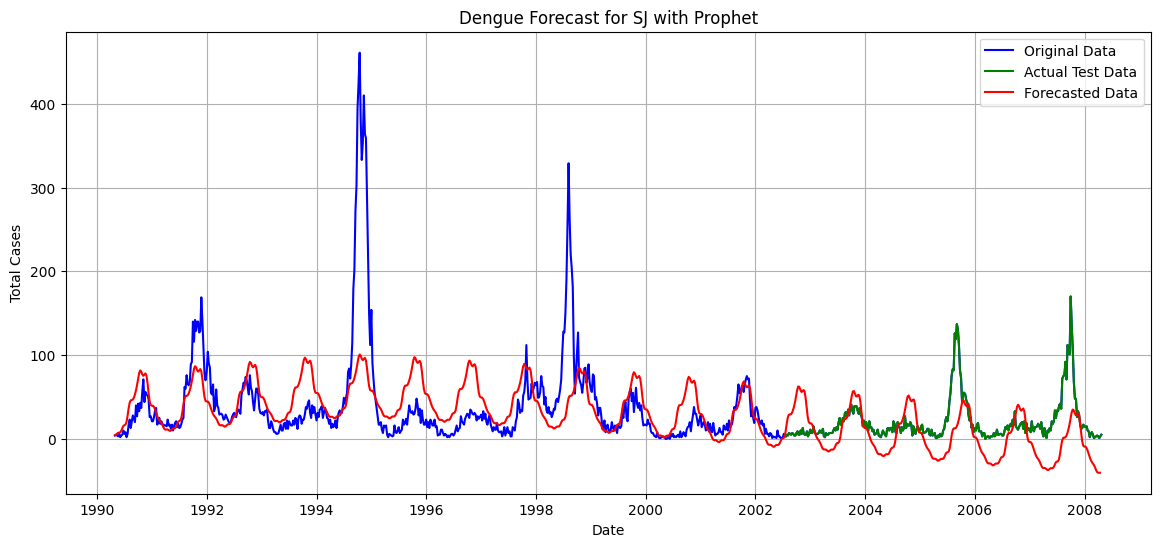

In [ ]:
# Plot original, test, and forecast
plt.figure(figsize=(14, 6))
plt.plot(city_df['ds'], city_df['y'], label='Original Data', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data', color='green')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title(f"Dengue Forecast for {city.upper()} with Prophet")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Merge forecast and test on date
forecast_df = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_df, on='ds', how='inner')

# Extract true and predicted values
true = merged['y'].values
predicted = merged['yhat'].values

# Evaluation metrics
mse = mean_squared_error(true, predicted)
rmse = sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 557.00
Root Mean Squared Error (RMSE): 23.60


# **Second Code**

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (use the actual file name if needed)
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')

# Convert date column to datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'], format='%d-%m-%Y')

# Sort by date
df = df.sort_values('week_start_date')

# Preview
df.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
# Aggregate total dengue cases per week
agg_df = df.groupby('week_start_date')['total_cases'].sum().reset_index()

# Rename for Prophet
agg_df = agg_df.rename(columns={'week_start_date': 'ds', 'total_cases': 'y'})

# Sort just in case
agg_df = agg_df.sort_values('ds').reset_index(drop=True)

# Show the first few rows
agg_df.head()


,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6


In [ ]:
# 80% train, 20% test split by length
split_idx = int(len(agg_df) * 0.8)
train_df = agg_df[:split_idx].reset_index(drop=True)
test_df = agg_df[split_idx:].reset_index(drop=True)

print(f"Train samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

forecast_weeks = int(input("Enter number of weeks to forecast: "))
print(f"Forecasting {forecast_weeks} weeks into the future.")



Train samples: 839
Test samples: 210
Enter number of weeks to forecast: 500
Forecasting 500 weeks into the future.


In [ ]:
# Initialize and train Prophet model
model = Prophet()
model.fit(train_df)

# Create future dataframe and forecast
future = model.make_future_dataframe(periods=forecast_weeks, freq='W')
forecast = model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1aex3cz/gw74_1ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1aex3cz/rnsah6nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54383', 'data', 'file=/tmp/tmpq1aex3cz/gw74_1ha.json', 'init=/tmp/tmpq1aex3cz/rnsah6nk.json', 'output', 'file=/tmp/tmpq1aex3cz/prophet_modelgl_tbesx/prophet_model-20250718093003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


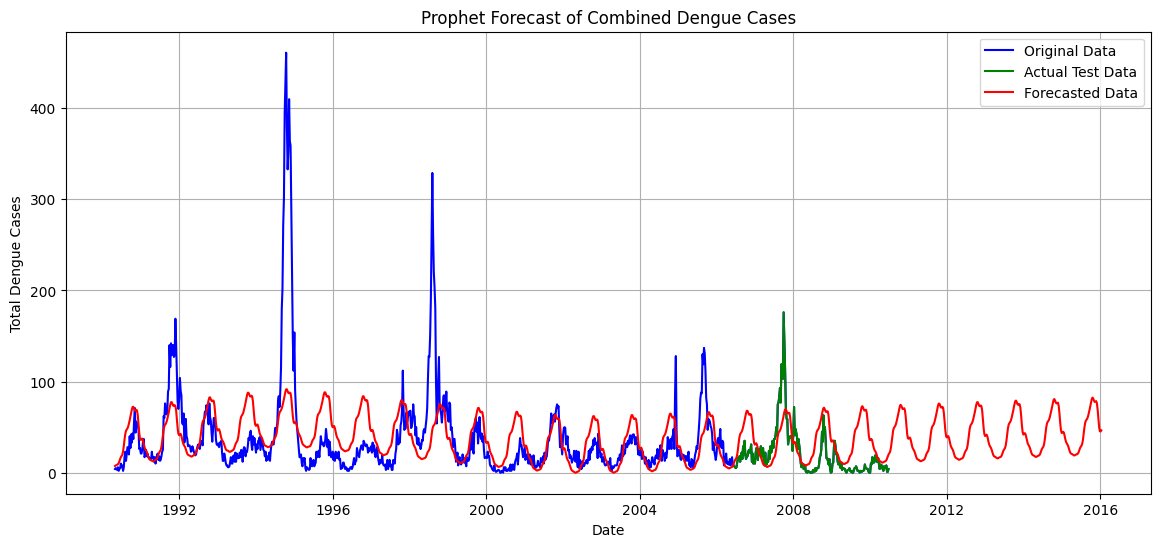

In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))

# Actual full data
plt.plot(agg_df['ds'], agg_df['y'], label='Original Data', color='blue')

# Actual test data
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data', color='green')

# Forecasted data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')

plt.xlabel("Date")
plt.ylabel("Total Dengue Cases")
plt.title("Prophet Forecast of Combined Dengue Cases")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Normalize dates
test_df['ds'] = pd.to_datetime(test_df['ds']).dt.normalize()
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.normalize()

# Merge test with forecast
forecast_df = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_df, on='ds', how='inner')

# Compute MSE or return NaN if empty
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
import numpy as np

if not merged.empty:
    true = merged['y'].values
    predicted = merged['yhat'].values
    mse = mean_squared_error(true, predicted)
else:
    mse = np.nan  # or use 0 if preferred

print(f"MSE : {mse:.2f}")
print(f"RMSE :{root_mean_squared_error(true, predicted):.2f}")
print(f"MAE : {mean_absolute_error(true, predicted):.2f}")


MSE : 974.54
RMSE :31.22
MAE : 28.04


# **Third Code**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


# Load your dataset
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')  # Replace with your actual file path

df


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,28-05-2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,04-06-2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,11-06-2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,18-06-2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [76]:
# prompt: plot df

# Display descriptive statistics for the DataFrame
print(df.describe())

# Display information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714  

In [79]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/sample_data/dengue data 17-07-2025.csv')  # Replace with your actual file path

# Convert week_start_date to datetime and rename it to 'ds'
df['ds'] = pd.to_datetime(df['week_start_date'])
df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True)

# sort so you keep the earliest or latest occurrence
df = df.sort_values(['week_start_date', 'city'])

# drop any repeated week_start_date (keeps the first by default)
df_clean = df.drop_duplicates(subset=['week_start_date'], keep='first').reset_index(drop=True)

print(df_clean.shape, "→ duplicates removed")

# Rename total_cases column to 'y' (required by Prophet)
df.rename(columns={'total_cases': 'y'}, inplace=True)

# List of regressors we will use
regressors = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
              'precipitation_amt_mm',
              'reanalysis_air_temp_k',
              'reanalysis_relative_humidity_percent']

# Final dataframe with required columns
agg_df = df[['ds', 'y'] + regressors].dropna().reset_index(drop=True)
agg_df


(1049, 26) → duplicates removed


/tmp/ipython-input-79-3196615399.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['week_start_date'])


,ds,y,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_relative_humidity_percent
0,1990-04-30,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,73.365714
1,1990-05-07,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,77.368571
2,1990-05-14,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,82.052857
3,1990-05-21,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,80.337143
4,1990-05-28,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,80.460000
...,...,...,...,...,...,...,...,...,...
1237,2010-05-28,5,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,88.765714
1238,2010-06-04,8,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,91.600000
1239,2010-06-11,1,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,94.280000
1240,2010-06-18,1,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,94.660000


In [80]:
import pandas as pd

df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True)

# sort so you keep the earliest or latest occurrence
df = df.sort_values(['week_start_date', 'city'])

# drop any repeated week_start_date (keeps the first by default)
df_clean = df.drop_duplicates(subset=['week_start_date'], keep='first').reset_index(drop=True)

print(df_clean.shape, "→ duplicates removed")

(1049, 26) → duplicates removed


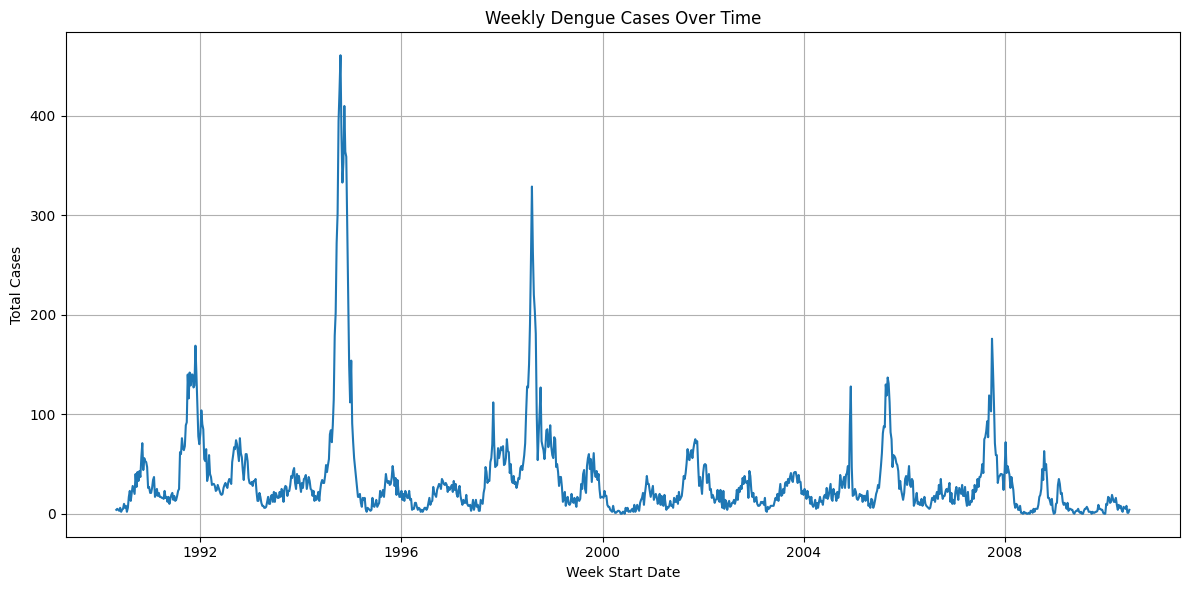

In [81]:
# # prompt: plot df on graph

# import matplotlib.pyplot as plt
# # Display the first few rows of the DataFrame
# print(df.head())

# print(df.columns.tolist())
# weekly = (
#     df.groupby('week_start_date', as_index=False)
#     ['y'].sum()
# )

# # Plot a simple line chart for 'total_cases' against 'week_start_date'
# plt.figure(figsize=(12, 6))
# plt.plot(df['week_start_date'], df['y'])
# plt.xlabel('Week Start Date')
# plt.ylabel('Total Cases')
# plt.title('Total Dengue Cases Over Time')
# plt.grid(True)
# plt.show()

# After your cleaning steps…
# plt.figure(figsize=(12, 6))
# plt.plot(
#     df_clean['week_start_date'],
#     df_clean['total_cases'],
#     marker='o',
#     linestyle='-'
# )
# plt.xlabel('Week Start Date')
# plt.ylabel('Total Cases')
# plt.title('Total Dengue Cases Over Time (Deduplicated)')
# plt.grid(True)
# plt.show()

# print(df.columns.tolist())
# weekly = (
#     df.groupby('week_start_date', as_index=False)
#     ['y'].sum()
# )
# # weekly = []

# plt.figure(figsize=(12, 6))
# plt.plot(
#     weekly['week_start_date'],
#     weekly['y'],
#     marker='o',
#     linestyle='-',
#     color='tab:green'
# )
# plt.xlabel('Week Start Date')
# plt.ylabel('Total Cases')
# plt.title('Weekly Dengue Cases (All Cities Combined)')
# plt.grid(True)
# plt.show()
import pandas as pd

# Ensure datetime format
df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True)

# Sum all y’s per week
weekly = (
    df
    .groupby('week_start_date', as_index=False)['y']
    .sum()
)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(
    weekly['week_start_date'],
    weekly['y'],
    # marker='o',
    linestyle='-',
    color='tab:blue'
)
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.title('Weekly Dengue Cases Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# 80/20 split
split_idx = int(len(agg_df) * 0.8)
train_df = agg_df[:split_idx].reset_index(drop=True)
test_df = agg_df[split_idx:].reset_index(drop=True)

print(f"Train samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")


Train samples: 993
Test samples: 249


In [83]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

best_mse = float('inf')
best_params = {}

for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:
        model = Prophet(
            changepoint_prior_scale=cps,
            seasonality_prior_scale=sps,
            weekly_seasonality=True,
            yearly_seasonality=True
        )

        for reg in regressors:
            model.add_regressor(reg)

        model.fit(train_df)

        # Predict on test set
        future = test_df[['ds'] + regressors].copy()
        forecast = model.predict(future)

        # Merge and evaluate
        merged = pd.merge(test_df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

        if not merged.empty:
            mse = mean_squared_error(merged['y'], merged['yhat'])
            print(f"cps={cps}, sps={sps} => MSE={mse:.2f}")
            if mse < best_mse:
                best_mse = mse
                best_params = {'changepoint_prior_scale': cps, 'seasonality_prior_scale': sps}

print(f"\n✅ Best params: {best_params}, Best MSE: {best_mse:.2f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/hc67o9aj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/j69iorrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59952', 'data', 'file=/tmp/tmpn7ajqz2n/hc67o9aj.json', 'init=/tmp/tmpn7ajqz2n/j69iorrv.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelispaxn_t/prophet_model-20250721081829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7

cps=0.001, sps=0.01 => MSE=630.52


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/7kdxtnqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/vv_9oa0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78725', 'data', 'file=/tmp/tmpn7ajqz2n/7kdxtnqg.json', 'init=/tmp/tmpn7ajqz2n/vv_9oa0o.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelpq36u8z_/prophet_model-20250721081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


cps=0.001, sps=0.1 => MSE=694.57


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/2xw3reez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/zrj5d_69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5343', 'data', 'file=/tmp/tmpn7ajqz2n/2xw3reez.json', 'init=/tmp/tmpn7ajqz2n/zrj5d_69.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_model_5r62g5a/prophet_model-20250721081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


cps=0.001, sps=1.0 => MSE=704.72


08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/aq4iadri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/di3vutwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19688', 'data', 'file=/tmp/tmpn7ajqz2n/aq4iadri.json', 'init=/tmp/tmpn7ajqz2n/di3vutwg.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelwhv8ijgf/prophet_model-20250721081830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


cps=0.01, sps=0.01 => MSE=962.73


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/3zp9rhvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/imyxfwab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46794', 'data', 'file=/tmp/tmpn7ajqz2n/3zp9rhvy.json', 'init=/tmp/tmpn7ajqz2n/imyxfwab.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelvmkl2r46/prophet_model-20250721081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


cps=0.01, sps=0.1 => MSE=1058.59


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/y3uom_ck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/9rnnwnjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18543', 'data', 'file=/tmp/tmpn7ajqz2n/y3uom_ck.json', 'init=/tmp/tmpn7ajqz2n/9rnnwnjm.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelqshjb9vw/prophet_model-20250721081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


cps=0.01, sps=1.0 => MSE=1085.12


08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/6cd98p0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/brpc5jdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34352', 'data', 'file=/tmp/tmpn7ajqz2n/6cd98p0a.json', 'init=/tmp/tmpn7ajqz2n/brpc5jdh.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelq0bstevb/prophet_model-20250721081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


cps=0.1, sps=0.01 => MSE=598.88


08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/6nc_9_b1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/02lw5s1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12877', 'data', 'file=/tmp/tmpn7ajqz2n/6nc_9_b1.json', 'init=/tmp/tmpn7ajqz2n/02lw5s1h.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelpcr69rhg/prophet_model-20250721081832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


cps=0.1, sps=0.1 => MSE=829.12


08:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


cps=0.1, sps=1.0 => MSE=738.23

✅ Best params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}, Best MSE: 598.88


In [84]:
# Train final model on all train data
model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    weekly_seasonality=True,
    yearly_seasonality=True
)

for reg in regressors:
    model.add_regressor(reg)

model.fit(train_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/zx5sxodh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn7ajqz2n/790bz768.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10509', 'data', 'file=/tmp/tmpn7ajqz2n/zx5sxodh.json', 'init=/tmp/tmpn7ajqz2n/790bz768.json', 'output', 'file=/tmp/tmpn7ajqz2n/prophet_modelvav3922s/prophet_model-20250721081836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [85]:
forecast_weeks = int(input("Enter number of weeks to forecast: "))

# Step 1: Create future dataframe with Prophet (this includes both train & future dates)
future = model.make_future_dataframe(periods=forecast_weeks, freq='W')

# Step 2: Rebuild regressor matrix for full future dates
# First, create a DataFrame with just dates and merge regressors manually
regressor_df = train_df[['ds'] + regressors].copy()

# Step 3: Merge historical regressors into future dates
future_full = pd.merge(future, regressor_df, on='ds', how='left')

# Step 4: Fill missing future regressors with last known values
last_values = train_df[regressors].iloc[-1]
for col in regressors:
    future_full[col].fillna(last_values[col], inplace=True)

# ✅ Final check
print("Shape match:", future_full.shape[0] == future.shape[0])
print("Any NaNs in ds:", future_full['ds'].isnull().any())


Enter number of weeks to forecast: 200
Shape match: False
Any NaNs in ds: False


/tmp/ipython-input-85-164370294.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future_full[col].fillna(last_values[col], inplace=True)


In [86]:
forecast = model.predict(future_full)

# Show only the forecasted portion
forecast.tail(forecast_weeks)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
993,2006-10-29,22.765972,-7.097608,52.496443
994,2006-11-05,22.851817,-6.118808,51.575641
995,2006-11-12,24.003086,-4.509335,53.678658
996,2006-11-19,25.994487,-2.809181,55.499953
997,2006-11-26,26.979700,-3.688091,55.412961
...,...,...,...,...
1188,2010-07-25,26.060032,-39.527696,77.661314
1189,2010-08-01,30.492046,-32.687255,85.740147
1190,2010-08-08,33.343251,-31.432995,88.614415
1191,2010-08-15,34.103585,-30.657815,88.845509


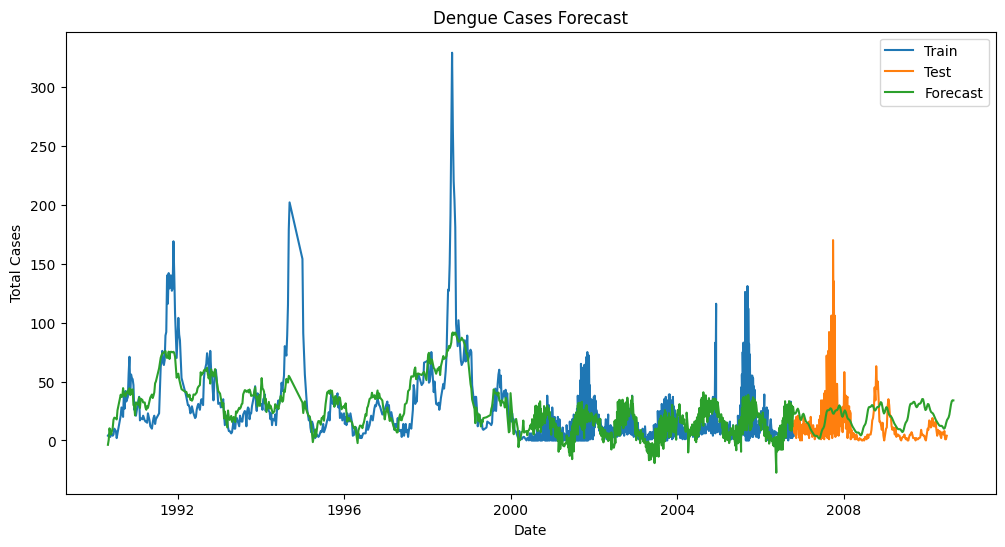

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train_df['ds'], train_df['y'], label='Train') # Changed weekly['y'] to train_df['y']
plt.plot(test_df['ds'], test_df['y'], label='Test')   # Changed weekly['y'] to test_df['y']
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Dengue Cases Forecast")
plt.legend()
plt.show()

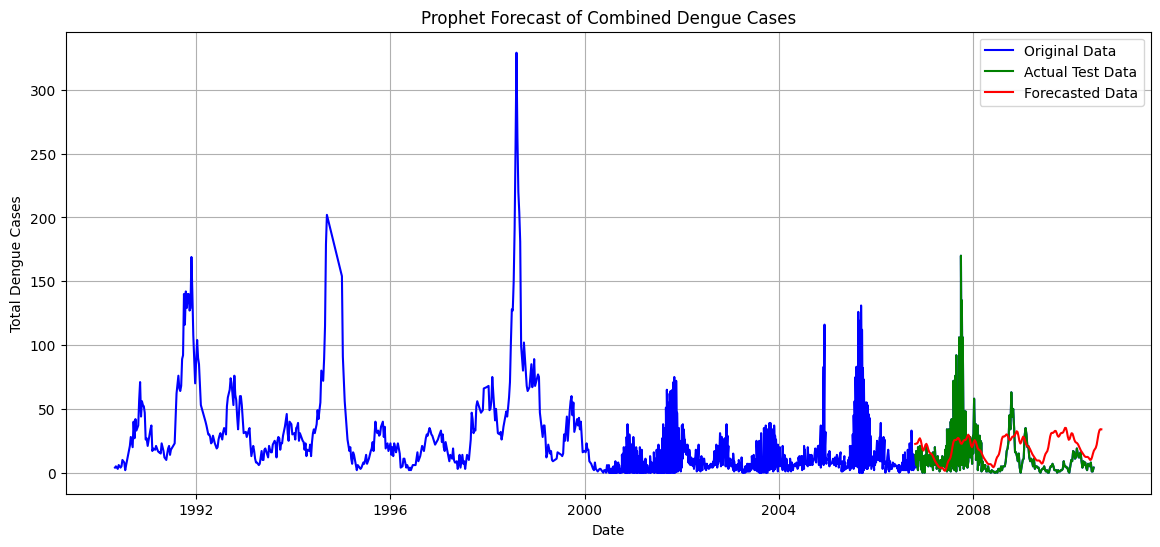

MSE : 196.53
RMSE :14.02
MAE : 12.54


In [94]:
# prompt: make a graph of actual,test and forecast data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error # Import necessary metrics

# Normalize dates for merging and plotting
test_df['ds'] = pd.to_datetime(test_df['ds']).dt.normalize()
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.normalize()


# Merge test and forecast to calculate metrics
# Filter forecast to include only dates in test_df for accurate metric calculation
merged = forecast[forecast['ds'].isin(test_df['ds'])].copy()
merged = pd.merge(merged, test_df[['ds', 'y']], on='ds', how='left')



# Plot the results
plt.figure(figsize=(14, 6))

# Actual full data (train + test)
plt.plot(agg_df['ds'], agg_df['y'], label='Original Data', color='blue')

# Actual test data (subset of original data)
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data', color='green')

# Forecasted data (plot the relevant portion that overlaps with or extends beyond test data)
# To avoid plotting the entire historical forecast, we can filter forecast to start from the beginning of the test data
start_date_test = test_df['ds'].min()
forecast_plot_df = forecast[forecast['ds'] >= start_date_test]
plt.plot(forecast_plot_df['ds'], forecast_plot_df['yhat'], label='Forecasted Data', color='red')


plt.xlabel("Date")
plt.ylabel("Total Dengue Cases")
plt.title("Prophet Forecast of Combined Dengue Cases")
plt.legend()
plt.grid(True)
plt.show()

# Compute MSE or return NaN if empty
if not merged.empty:
    true = merged['y'].values
    predicted = merged['yhat'].values
    mse = mean_squared_error(true, predicted)
else:
    mse = np.nan  # or use 0 if preferred

print(f"MSE : {mse:.2f}")
if not merged.empty:
    print(f"RMSE :{root_mean_squared_error(true, predicted):.2f}")
    print(f"MAE : {mean_absolute_error(true, predicted):.2f}")
else:
    print("RMSE : NaN")
    print("MAE : NaN")

In [90]:
test_dates = set(test_df['ds'].astype(str))
forecast_dates = set(forecast['ds'].astype(str))

common_dates = list(test_dates.intersection(forecast_dates))

print(f"Number of dates in test_df: {len(test_dates)}")
print(f"Number of dates in forecast: {len(forecast_dates)}")
print(f"Number of common dates: {len(common_dates)}")

if len(common_dates) == 0:
    print("No common dates found between test_df and forecast.")
else:
    print("Common dates found. First 5 common dates:")
    print(common_dates[:5])

Number of dates in test_df: 190
Number of dates in forecast: 924
Number of common dates: 10
Common dates found. First 5 common dates:
['2006-10-29', '2006-11-19', '2006-11-05', '2006-12-03', '2006-11-12']
